In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.shape

(1338, 7)

In [3]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [22]:
df['sex'] = df['sex'].replace({'male':0,'female':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df['region'] = df['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [23]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,1,1,16884.924


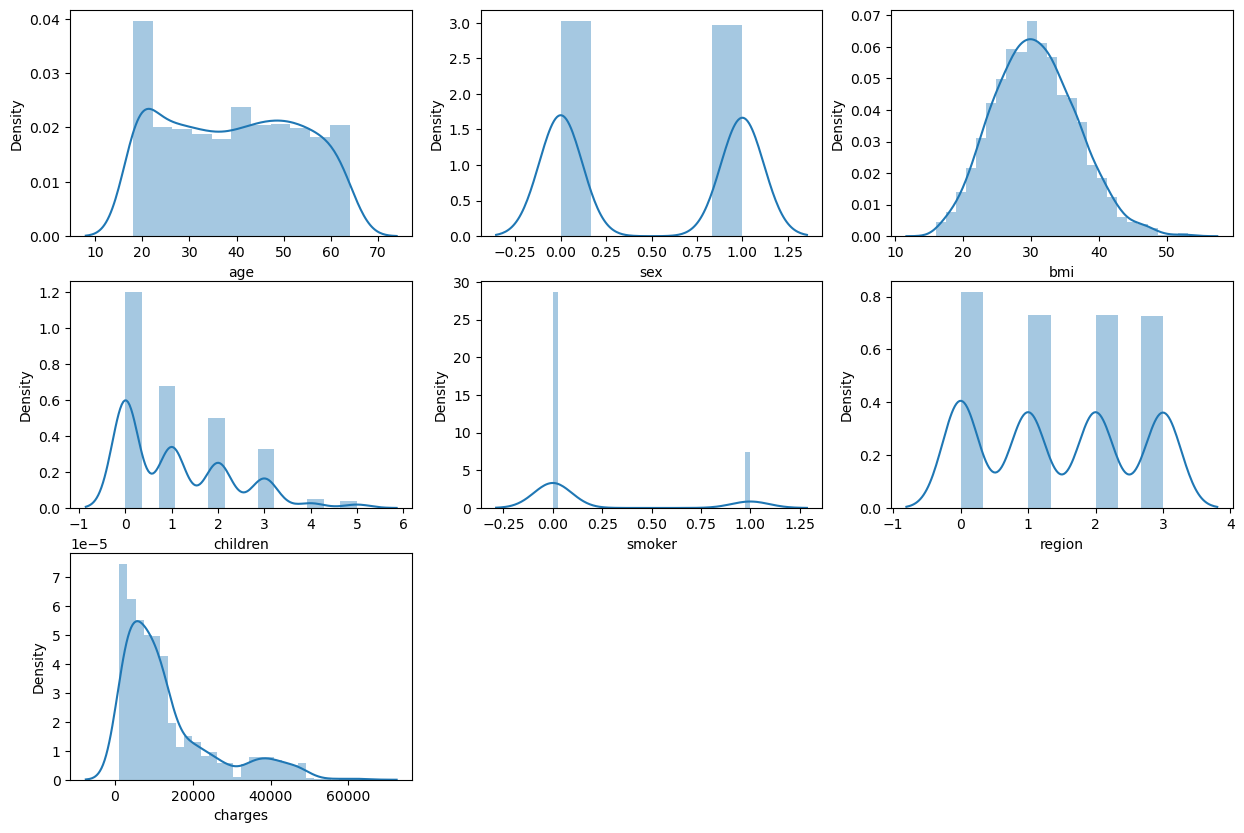

In [29]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show() 

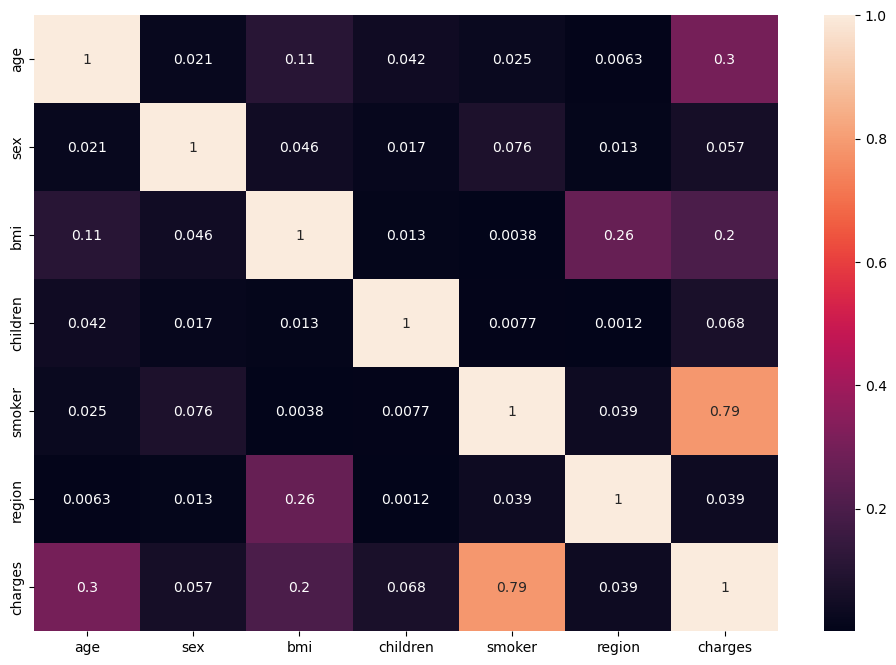

In [32]:
df_corr = df.corr().abs()

plt.figure(figsize =(12,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [30]:
x = df.drop(columns=['charges'])
y= df['charges']

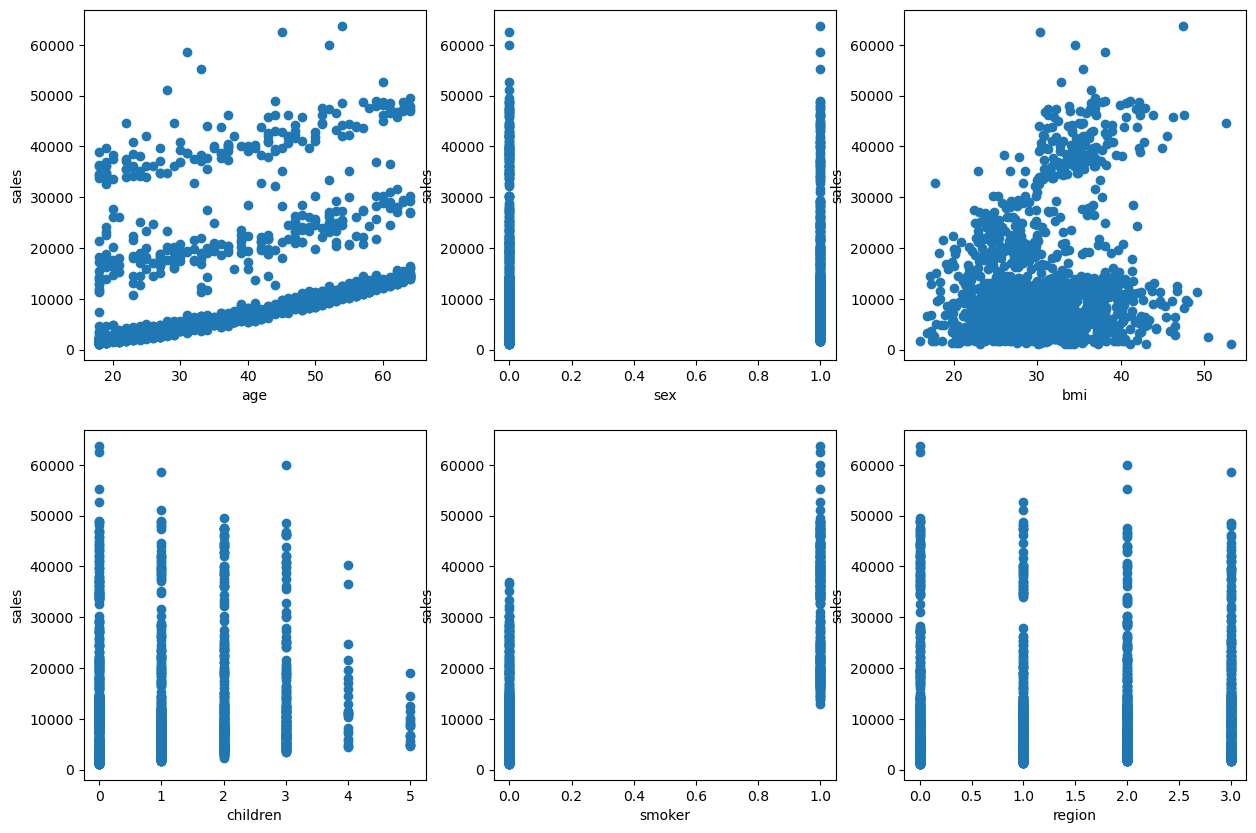

In [31]:
plt.figure(figsize =(15,10))
plotnumber=1

for column in x:
    if plotnumber<=7:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('sales')
    plotnumber+=1
    
plt.show()

In [34]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.20,random_state=342)

In [36]:
reg_model = LinearRegression()

reg_model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_train_pred = reg_model.predict(x_train)

In [38]:
y_test_pred = reg_model.predict(x_test)

In [41]:
print(r2_score(y_train,y_train_pred)*100)
print(r2_score(y_test,y_test_pred)*100)

76.17087826729517
70.0634655134785


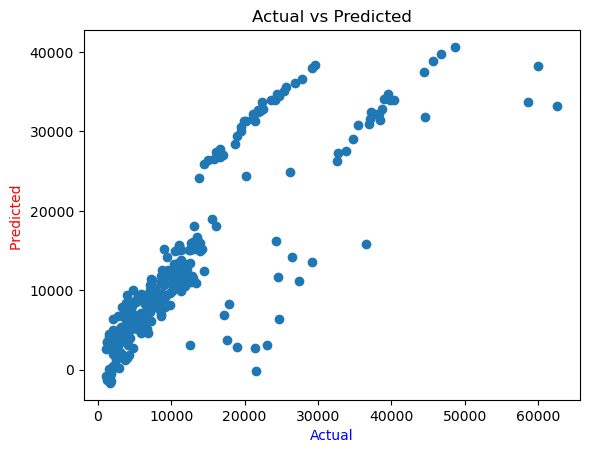

In [45]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual',color='blue')
plt.ylabel('Predicted ',color='red')
plt.title('Actual vs Predicted')
plt.show()

In [46]:
mean_absolute_error(y_test,y_test_pred)

4327.820945570937

In [47]:
mean_squared_error(y_test,y_test_pred)

41732224.67107666

In [48]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

6460.04834897361